In [1]:
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = df[df['job_title_short']== 'Data Engineer']
df_exploded = df.explode('job_skills')
asd = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
asd = asd.sort_values(by='skill_count', ascending=False).head(10)

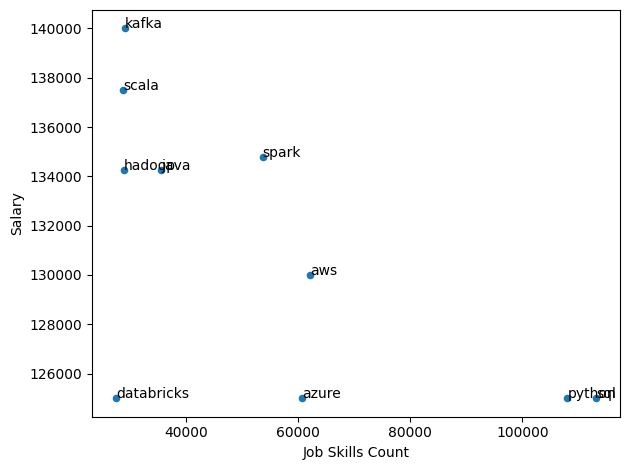

In [5]:
asd.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Job Skills Count')
plt.ylabel('Salary')
plt.tight_layout()

for i, txt in enumerate(asd.index):
    plt.text(asd['skill_count'].iloc[i], asd['median_salary'].iloc[i], txt)

plt.show()